## 보스턴 주택 가격 데이터셋

1970년 중반 보스턴 외곽 지역의 범죄율, 지방세율 등의 데이터가 주어졌을 때 주택 가격의 중간 값을 예측해 보겠습니다.

여기서 사용할 데이터셋은 이전 두 개의 예제와 다릅니다. 데이터 포인트가 506개로 비교적 개수가 적고 404개는 훈련 샘플로 102개는 테스트 샘플로 나누어져 있습니다. 입력 데이터에 있는 각 특성(예를 들어 범죄율)은 스케일이 서로 다릅니다. 어떤 값은 0과 1 사이의 비율을 나타내고 어떤 것은 1과 12 사이의 값을 가지거나 1과 100 사이의 값을 가집니다.


In [1]:
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
# 데이터 준비
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std

# 테스트 데이터를 정규화할 때 사용한 값이 훈련데이터에서 계산한 값임을 유의
# ML 작업 과정에서 절대로 테스트 데이터에서 계산한 어떤 값도 사용해서는 안됨.
# 데이터 정규화처럼 간단한 작업도 마찬가지로 적용.
test_data -= mean
test_data /= std

In [4]:
train_data[:5]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006],
       [-0.40149354, -0.48361547, -0.86940196, -0.25683275, -0.3615597 ,
        -0.3245576 , -1.23667187,  1.10717989, -0.51114231, -1.094663  ,
         0.78447637,  0.44807713, -0.65292624],
       [-0.0056343 , -0.48361547,  1.0283258 , -0.25683275,  1.32861221,
         0.15364225,  0.69480801, -0.57857203,  1.67588577,  1.5652875 ,
         0.78447637,  0.3898823 ,  0.26349695]])

In [6]:
print(train_data.mean(), train_data.std())

2.6016254395785847e-15 0.9999999999999993


In [7]:
# 모델 구성
from tensorflow.keras import models, layers
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64,activation = 'relu', input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64,activation='relu'))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
  return model

In [10]:
# k fold 사용
import numpy as np
k = 4

num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
  print('처리중인 fold: ',i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis = 0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis = 0)

  model = build_model()
  model.fit(partial_train_data, partial_train_targets,
            epochs=num_epochs, batch_size = 1, verbose = 0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose = 0)
  all_scores.append(val_mae)

처리중인 fold:  0
처리중인 fold:  1
처리중인 fold:  2
처리중인 fold:  3


In [11]:
all_scores

[2.259660243988037, 3.0430848598480225, 3.017643928527832, 2.4551379680633545]

In [13]:
np.mean(all_scores)

2.6938817501068115

In [15]:
from tensorflow.keras import backend as K

# 메모리 해제

K.clear_session()

[과제] num_epochs = 500을 적용하여 모델 학습 및 평가 수행

In [38]:
k = 4
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print('처리중인 fold: ',i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i+1)*num_val_samples:]],
       axis = 0)
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i+1)*num_val_samples:]],
       axis = 0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_targets,
                      validation_data = (val_data, val_targets),
            epochs=num_epochs, batch_size = 1, verbose = 0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

처리중인 fold:  0
처리중인 fold:  1
처리중인 fold:  2
처리중인 fold:  3


In [39]:
average_mae_history = [
                       np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

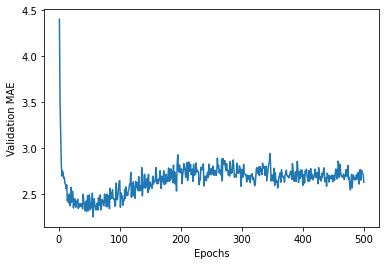

In [40]:
import matplotlib.pyplot as plt

plt.plot(range(1,len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

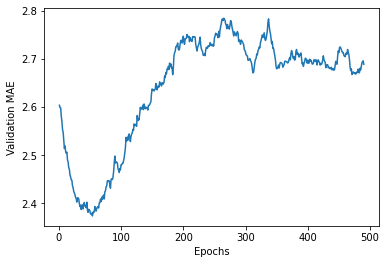

In [41]:
def smooth_curve(points, factor = 0.9):
  smooth_points = []
  for point in points:
    if smooth_points:
      previous = smooth_points[-1]
      smooth_points.append(previous * factor + point * (1-factor))
    else:
      smooth_points.append(point)
  return smooth_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [43]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size = 16, verbose = 0)
test_mse_score, test_mae_score = model.evaluate(test_data,test_targets)

4/4 [==============================] - 0s 3ms/step - loss: 18.4421 - mae: 2.8827
